In [ ]:
# 0d7e6e68-a711-5b78-a38e-8d4d5d9fc9a7_transactions_history.csv

Timestamp
2017-12-22 06:26:46+00:00   NaN
2017-12-22 06:33:39+00:00   NaN
2017-12-22 06:34:05+00:00   NaN
2017-12-22 06:34:28+00:00   NaN
2017-12-22 15:50:36+00:00   NaN
                             ..
2023-12-26 15:35:53+00:00   NaN
2023-12-26 15:35:55+00:00   NaN
2023-12-27 04:09:41+00:00   NaN
2024-01-02 04:02:52+00:00   NaN
2024-01-12 12:33:10+00:00   NaN
Name: Quantity Transacted, Length: 329, dtype: float64


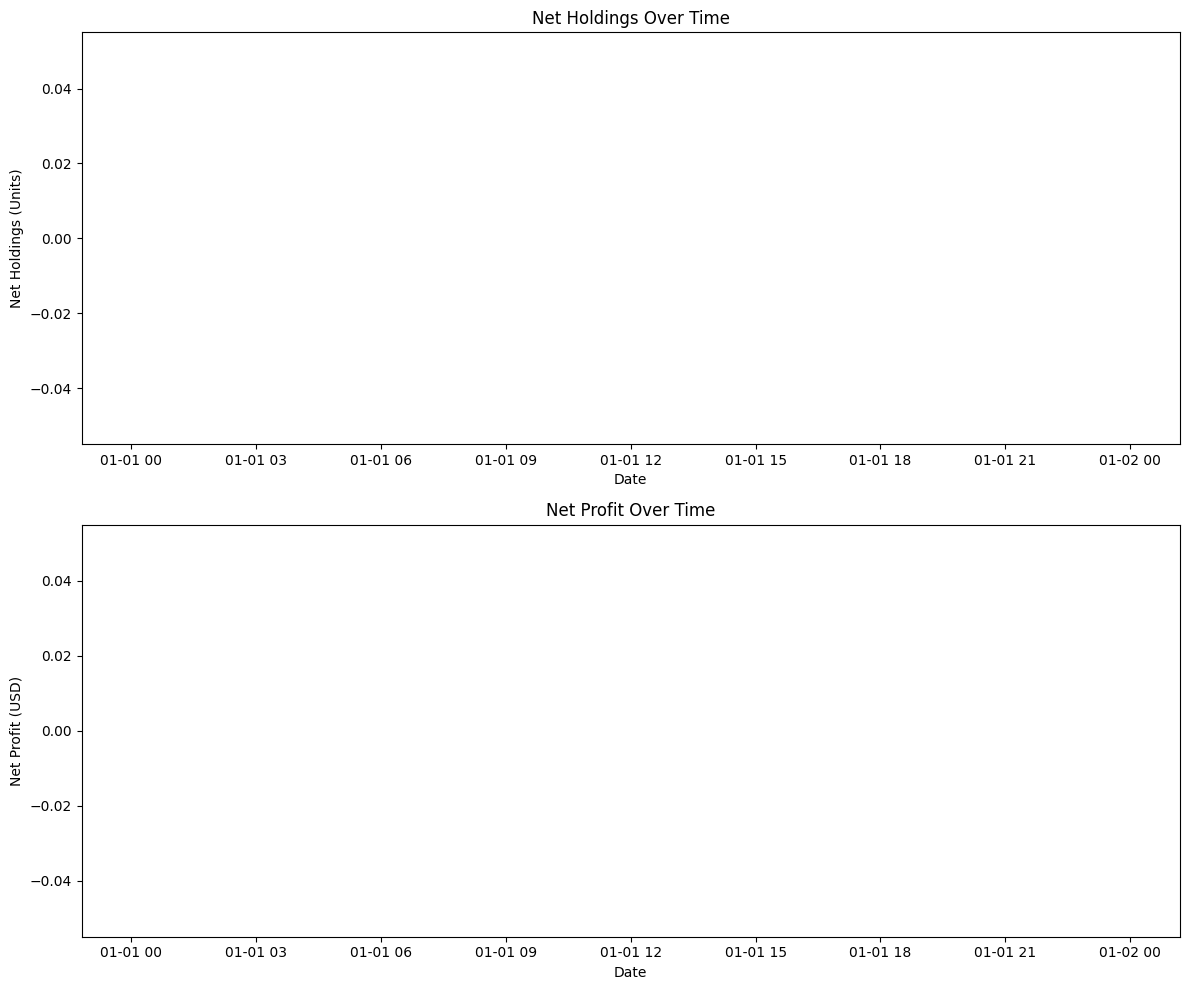

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
file_path = '0d7e6e68-a711-5b78-a38e-8d4d5d9fc9a7_transactions_history.csv'  # Replace with your file path
crypto_data = pd.read_csv(file_path)
crypto_data = crypto_data.drop([0, 1])  # Remove header and user info rows
crypto_data.columns = ['Timestamp', 'Transaction Type', 'Asset', 'Quantity Transacted',
                       'Spot Price Currency', 'Spot Price at Transaction', 'Subtotal',
                       'Total (inclusive of fees)', 'Fees and/or Spread', 'Notes']
crypto_data['Timestamp'] = pd.to_datetime(crypto_data['Timestamp'])
crypto_data['Quantity Transacted'] = pd.to_numeric(crypto_data['Quantity Transacted'], errors='coerce')
crypto_data['Spot Price at Transaction'] = pd.to_numeric(crypto_data['Spot Price at Transaction'], errors='coerce')
crypto_data['Subtotal'] = pd.to_numeric(crypto_data['Subtotal'], errors='coerce')
crypto_data['Total (inclusive of fees)'] = pd.to_numeric(crypto_data['Total (inclusive of fees)'], errors='coerce')
crypto_data['Fees and/or Spread'] = pd.to_numeric(crypto_data['Fees and/or Spread'], errors='coerce')
valid_transactions = ['Buy', 'Sell', 'Withdrawal', 'Send']
crypto_data = crypto_data[crypto_data['Transaction Type'].isin(valid_transactions)]

# Split data by transaction type
buy_transactions = crypto_data[crypto_data['Transaction Type'] == 'Buy']
sell_transactions = crypto_data[crypto_data['Transaction Type'] == 'Sell']
withdrawal_transactions = crypto_data[crypto_data['Transaction Type'] == 'Withdrawal']
send_transactions = crypto_data[crypto_data['Transaction Type'] == 'Send']

# Calculate average buy and sell prices
average_buy_prices = buy_transactions.groupby('Asset')['Spot Price at Transaction'].mean()
average_sell_prices = sell_transactions.groupby('Asset')['Spot Price at Transaction'].mean()

# Calculate net profit and holdings
net_profit = sell_transactions['Total (inclusive of fees)'].sum() - buy_transactions['Total (inclusive of fees)'].sum()
net_holdings = buy_transactions['Quantity Transacted'].sum() - (sell_transactions['Quantity Transacted'].sum() 
                                                              + send_transactions['Quantity Transacted'].sum() 
                                                              + withdrawal_transactions['Quantity Transacted'].sum())

# Time series for net holdings and profit
buy_time_series = buy_transactions.groupby('Timestamp')['Quantity Transacted'].sum().cumsum()
sell_time_series = sell_transactions.groupby('Timestamp')['Quantity Transacted'].sum().cumsum()
send_time_series = send_transactions.groupby('Timestamp')['Quantity Transacted'].sum().cumsum()
withdrawal_time_series = withdrawal_transactions.groupby('Timestamp')['Quantity Transacted'].sum().cumsum()
net_holdings_time_series = buy_time_series - (sell_time_series + send_time_series + withdrawal_time_series)
buy_profit_time_series = buy_transactions.groupby('Timestamp')['Total (inclusive of fees)'].sum().cumsum()
sell_profit_time_series = sell_transactions.groupby('Timestamp')['Total (inclusive of fees)'].sum().cumsum()
net_profit_time_series = sell_profit_time_series - buy_profit_time_series

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax[0].plot(net_holdings_time_series, color='blue')
print(net_holdings_time_series)
ax[0].set_title('Net Holdings Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Net Holdings (Units)')
ax[1].plot(net_profit_time_series, color='green')
ax[1].set_title('Net Profit Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Net Profit (USD)')
plt.tight_layout()
plt.show()
